In [7]:
import pandas as pd
df=pd.read_csv("weatherAUS.csv") #Kaggle>DL dataset as zip. Plus tard on pourra prendre aPI
liste_station = df["Location"].unique()
sorted(liste_station)

['Adelaide',
 'Albany',
 'Albury',
 'AliceSprings',
 'BadgerysCreek',
 'Ballarat',
 'Bendigo',
 'Brisbane',
 'Cairns',
 'Canberra',
 'Cobar',
 'CoffsHarbour',
 'Dartmoor',
 'Darwin',
 'GoldCoast',
 'Hobart',
 'Katherine',
 'Launceston',
 'Melbourne',
 'MelbourneAirport',
 'Mildura',
 'Moree',
 'MountGambier',
 'MountGinini',
 'Newcastle',
 'Nhil',
 'NorahHead',
 'NorfolkIsland',
 'Nuriootpa',
 'PearceRAAF',
 'Penrith',
 'Perth',
 'PerthAirport',
 'Portland',
 'Richmond',
 'Sale',
 'SalmonGums',
 'Sydney',
 'SydneyAirport',
 'Townsville',
 'Tuggeranong',
 'Uluru',
 'WaggaWagga',
 'Walpole',
 'Watsonia',
 'Williamtown',
 'Witchcliffe',
 'Wollongong',
 'Woomera']

In [8]:
import pandas as pd
import numpy as np

import geopandas as gpd
from shapely.geometry import Point #Pour faire GeoDataFrame
import contextily as ctx #Pour ajouter une carte à l"arriere plan
import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim
import time
import plotly.express as px
import plotly.subplots as sp

In [9]:
#Coordoonnées des stations actives avec fichiers de listes des stations du BOM
#Prendre la meilleur source #Coordonnées des stations :http://www.bom.gov.au/climate/cdo/about/sitedata.shtml Mettre rainfall 
# ou http://www.bom.gov.au/climate/data/stations/ 1/state Australia. 2 Rainfall

import pandas as pd

df_station = pd.read_fwf(("stations_data.txt"))


df_station = df_station.drop(0, axis=0) #Enlève la ligne  avec des ----

# Conversion des types des variables
df_station["Start"] = df_station["Start"].astype(int)
df_station["Site"] = df_station["Site"].astype(int)
df_station["Lat"] = df_station["Lat"].astype(float)
df_station["Lon"] = df_station["Lon"].astype(float)

#Enlever end <2017 --> Supprime 13.000 vieilles stations
df_station["End"] = df_station["End"].replace(to_replace="..", value="9999") #Les stations tjs ouvertes ont "..", le convertir en 9999
df_station["End"] = df_station["End"].astype(int)
df_station = df_station.loc[df_station["End"] > 2017]
#ou celles ouvertes après le début des relevés du dataset
df_station = df_station.loc[df_station["Start"] < 2014]

In [10]:
# code de Florent pour récupérer les coordoonées GPS des df["Location"] --> dico : localisations {Location: Lat, Lon}

df=pd.read_csv("weatherAUS.csv") #Kaggle>DL dataset as zip. Plus tard on pourra prendre aPI


geolocator = Nominatim(user_agent="australia_weather_geo")

# Récup stations 
liste_station = df["Location"].unique()

# Dictionnaire pour stocker les positions GPS
localisations = {}

# Récup des données GPS 
for station in liste_station:
    try:
        location = geolocator.geocode(f"{station}, Australia")
        if location:
            localisations[station] = (location.latitude, location.longitude)
            print(f"{station}: {location.latitude}, {location.longitude}")
        else:
            localisations[station] = (None, None)
            print(f"{station}: Non trouvé")
        time.sleep(1)  # Pause d'une seconde pour éviter d'être bloqué par l'API
    except Exception as e:
        print(f"Erreur pour {station}: {e}")
        localisations[station] = (None, None)


stations_manquantes= {
    "BadgerysCreek": "Badgerys Creek",
    "CoffsHarbour": "Coffs Harbour",
    "NorahHead": "Norah Head",
    "NorfolkIsland": "Norfolk Island",
    "SydneyAirport": "Sydney Airport", 
    "WaggaWagga": "Wagga Wagga",
    "MountGinini": "Mount Ginini", 
    "MelbourneAirport": "Melbourne Airport", 
    "MountGambier": "Mount Gambier", 
    "PearceRAAF": "RAAF Base Pearce", 
    "PerthAirport": "Perth Airport", 
    "SalmonGums": "Salmon Gums, Western Australia", 
    "AliceSprings": "Alice Springs, Northern Territory",}


n_localisations = {}

# Recherche des coordonnées 
for station, location_query in stations_manquantes.items():
    try:
        location = geolocator.geocode(location_query)
        if location:
            n_localisations [station] = (location.latitude, location.longitude)
            print(f"{station}: {location.latitude}, {location.longitude}")
        else:
            n_localisations[station] = (None, None)
            print(f"{station}: Non trouvé")
        time.sleep(1)  
    except Exception as e:
        print(f"Erreur pour {station}: {e}")
        n_localisations[station] = (None, None)


localisations.update(n_localisations)


Albury: -36.0737734, 146.9135265
BadgerysCreek: Non trouvé
Cobar: -31.9666628, 145.3045054
CoffsHarbour: Non trouvé
Moree: -29.4617202, 149.8407153
Newcastle: -32.9192953, 151.7795348
NorahHead: Non trouvé
NorfolkIsland: Non trouvé
Penrith: -33.7511954, 150.6941711
Richmond: -37.80745, 144.9907213
Sydney: -33.8698439, 151.2082848
SydneyAirport: Non trouvé
WaggaWagga: Non trouvé
Williamtown: -32.815, 151.8427778
Wollongong: -34.4243941, 150.89385
Canberra: -35.2975906, 149.1012676
Tuggeranong: -35.4209771, 149.0921341
MountGinini: Non trouvé
Ballarat: -37.5623013, 143.8605645
Bendigo: -36.7590183, 144.2826718
Sale: -38.1094463, 147.0656717
MelbourneAirport: Non trouvé
Melbourne: -37.8142454, 144.9631732
Mildura: -34.195274, 142.1503146
Nhil: -35.4325403, 141.2833862
Portland: -38.3456231, 141.6042304
Watsonia: -37.7109468, 145.0837808
Dartmoor: -37.895212, 141.2679429
Brisbane: -27.4689623, 153.0235009
Cairns: -16.9206657, 145.7721854
GoldCoast: -28.0805, 153.4309187
Townsville: -19.256

([], [])

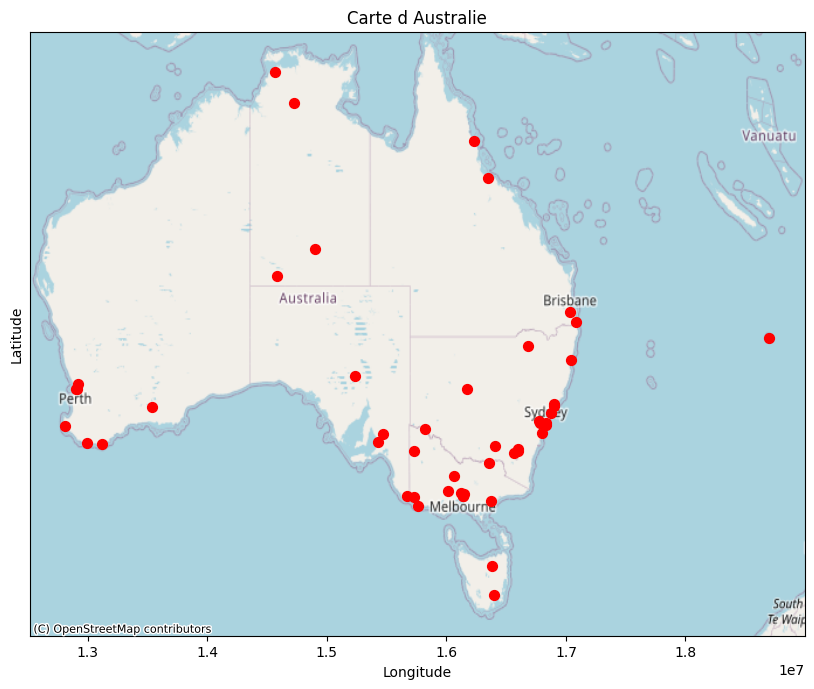

In [11]:
# Carte d'Australie en Mercator avec infos topo Json (Contextly/Geopandas/Matplotlib)
import geopandas as gpd
from shapely.geometry import Point #Pour faire GeoDataFrame
import contextily as ctx #Pour ajouter une carte à l"arriere plan
import matplotlib.pyplot as plt

#Dico de stations avec coordonnées -> en Dataframe
df_station = pd.DataFrame.from_dict(localisations, orient="index", columns=["Latitude", "Longitude"]).reset_index()
df_station.rename(columns={"index": "Location"}, inplace=True)

## 2. Transformer le df en GeoDataFrame
# 2a. Créer une géométrie de type Point
geometry = [Point(lon, lat) for lon, lat in zip(df_station["Longitude"], df_station["Latitude"])]
# 2b. Convertir en GeoDataFrame
gdf_villes = gpd.GeoDataFrame(df_station, geometry=geometry)

##3 Systeme de projection (CRS)
# 3a. Définir le CRS initial des données (WGS 84 - EPSG:4326)
gdf_villes.crs = "EPSG:4326" #Systemes de coordonnées géographiques : latitude, longitude
# 3b. Reprojeter les données 
#gdf_villes = gdf_villes.to_crs(epsg=3112) #(projection australienne : Australian National Grid)
gdf_villes = gdf_villes.to_crs(epsg=3857)#format openmap :Web Mercator


# 4. Créer le plot avec un fond de carte
fig, ax = plt.subplots(figsize=(10, 10))

# 6. Limiter l'étendue de la carte (zoom manuel si nécessaire)
# Limite les coordonnées à un secteur de l'Australie pour éviter un zoom trop large
minx, miny, maxx, maxy = gdf_villes.total_bounds
buffer = 300*1000  # Ajustez selon votre besoin (en mètres km*1000)
# Ajustez les limites
ax.set_xlim(minx - buffer, maxx + buffer)
ax.set_ylim(miny - buffer, maxy + buffer)

# 5. Ajouter la carte de fond (OpenStreetMap)
ctx.add_basemap(ax, crs=gdf_villes.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# 6. Afficher les villes sur la carte
gdf_villes.plot(ax=ax, marker="o", color="red", markersize=50, label="Site name")

# 7. Charger un fichier GeoJSON avec des données géographiques sur l"Australie
gdf_geojson = gpd.read_file("custom.geo.json")
#et l"ajouter au plot
gdf_geojson.plot(ax=ax, facecolor="lightgreen", edgecolor="black", alpha=1, label="Australie")

# 8. Titre et affichage
plt.title("Carte d Australie")
plt.xlabel("Longitude") #110 à 170 avec Norfolk island
plt.ylabel("Latitude") #-50 à -10
abscisse = ax.get_xticks()
test1= ax.get_xlim()
#plt.xticks (ticks = abscisse, labels=list(np.linspace(ax.get_xlim, 180, len(abscisse))) )
plt.yticks([])
#plt.legend()
#plt.show();


In [12]:
#Init carte de Florent
# Création du DataFrame des localisations 
localisations_df = pd.DataFrame.from_dict(localisations, orient="index", columns=["Latitude", "Longitude"]).reset_index()
localisations_df.rename(columns={"index": "Location"}, inplace=True)

df = df.merge(localisations_df, on="Location", how="left")

# Calcul de la moyenne par station 
rainfall_mean_by_location = df.groupby("Location")["Rainfall"].mean().reset_index()
rainfall_mean_by_location = rainfall_mean_by_location.merge(localisations_df, on="Location", how="left")  # Ajout des coordonnées



In [13]:
# Création de la carte -> code Florent
fig = px.scatter_geo(
    rainfall_mean_by_location,
    lat="Latitude",           
    lon="Longitude",          
    text="Location",          
    size="Rainfall",          
    size_max=20,              
    color="Rainfall",         
    title="Carte des précipitations moyennes par station ",
    projection="mercator",    
    hover_name="Location",    
    width=1000,
    height=1000               
)


fig.update_geos(
    center={"lat": -25.0, "lon": 133.0},  # Centrage de la carte sur l'Australie
    projection_scale=4.3,                 # Niveau de zoom
    showcountries=True,                   # Affichage des frontières
    showcoastlines=True,                   # Affichage des lignes de côte
    showframe=False                        # Suppression du cadre
)

# Ajustement des marges et de l'échelle de couleurs
fig.update_layout(
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    coloraxis_colorbar=dict(
        title="Précipitations (mm)",  # Titre de l'échelle des couleurs
        x=0.9,                        # Position horizontale de l'échelle
        y=0.8,                        # Position verticale de l'échelle
        len=0.3,                      # Taille de l'échelle
        thickness=15                  # Épaisseur de l'échelle
    )
)

# Affichage de la carte interactive
fig.show()
